# Symplectic integrators

## Exercise 1 
In this exercise we investigate the properties of several schemes numerical integration applied to Hamilton's equation: 

$$
\begin{equation}
\begin{aligned}
\dot{q} &= p, \\ \dot{p} &= -\nabla U (q),
\end{aligned}
\end{equation}
$$

where $ U : \mathbb{R}^n \rightarrow \mathbb{R}$ is a smooth potential function.
In the morning lecture several properties of the group of flow maps $$(\Phi_t)_{t \in \mathbb{R}},$$ associated with the above equation where discussed. Besides being symplectic, $\Phi_t$ satisfies the following properties: For any $t \in \mathbb{R}$ 
- $\Phi_t$ is energy conserving, i.e.,  $$H(q,p) = H(\Phi_t(q),\Phi_t(p))$$ for all $q,p\in \mathbb{R}^n$
- $\Phi_t$ is time reversible in the sense that $$(\Phi_t)^{-1} = \Phi_{-t}.$$

- $\Phi_t$ is volume preserving, i.e., 
$$\int_{\mathbb{R}^n \times \mathbb{R}^n} {\bf 1}_{\Phi_t(S)}(q,p) d q d p = \int_{\mathbb{R}^n \times \mathbb{R}^n} {\bf 1}_{S}(q,p) d q d p$$ for all measureable $S \subset \mathbb{R}^n \times \mathbb{R}^n$.

Let $\widehat{\Phi}_h$ denote the flow map of the discretized dynamics, i.e.,
$$(q_{n+1}, p_{n+1}) = \widehat{\Phi}_h(q_{n}, p_{n}),$$
where $h$ denotes the step size of the time discretization.
The properties are not necessarily inherited by the flow map $\widehat{\Phi}_h$ of the discretized dynamics. In what follows we will assess by numerical experiments which of the above properties are preserved in the case of the discretized dynamics when 
- the Standard Euler method 
- the Symplectic Euler method (see page 80 eq. (2.18)+(2.19) in Ben's book)
- the Velocity Verlet method (see page 64 in Ben's book)

is used. 

## Task:

- asses whether the energy and volume conservation properties and the time reversibility are satisfied for the standard Euler scheme by running the code fragments in the cells below

- implement the symplectic Euler scheme and the Velocity Verlet scheme as subclasses of the class integrators.HamDynIntegrator. You only need to redefine the function `traverse()` in the class definition. See the implementation of `integrators.EulerHamDyn` to see how this is done. You can find a detailed description of both schemes in Ben's book (Molecular Dynamics, Springer 2015). 

- Assess the energy and volume conservation properties as well as the time reversibility of these schemes 

- For both the Velocity Verlet method and the symplectic Euler plot the orbits for initial values $q_0=0$ and $p_0=1$ and stepsizes $h=2^{i}$ for $i=1,0,-1,-2,\dots$. To which levelset of which function does the orbit correspond to in the limit $h\rightarrow 0$? Would we obtain the same limiting orbit if we instead use the standard Euler scheme for integration?

In [4]:
# Import the relevant modules from miniMD 
import miniMD.models as models
import miniMD.integrators as integrators
import miniMD.outputshedulers as outp
# Import the numpy package
import numpy as np
# Import the pyplot package (we will need this later to create plots)
import matplotlib.pyplot as plt

We first take a look at the properties of the standard Euler integration scheme

$$
\begin{aligned}
q_{n+1} &= q_n + hp_n, \\ p_{n+1} &= p_n -h\nabla U (q_n).
\end{aligned}
$$

You can find an implementation of this scheme in the class `EulerHamDyn` in the file ./miniMD/integrators.py


In [5]:
dim = 1
model = models.HarmonicOscillator(k=1)
integrator = integrators.EulerHamDyn(model, h=.1)

#Initialising an outputsheduler. The 
op= outp.BufferedOutputshedulerU(integrator, Nsteps=1000, varname_list=['q','p'], modprnt=1)


initial_values={'q': np.array([1.0]), 'p': np.array([0.0])}

integrator.run(initial_values=initial_values)

The following code fragment plots the trace of the trajectory in phase space:

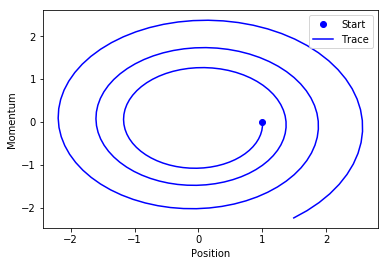

In [6]:
fig, ax = plt.subplots()
# Mark initial value with a circle
ax.plot(op.traj_q[0,0],op.traj_p[0,0],'bo',label='Start')
# Plot trace of the first 200 time steps
ax.plot(op.traj_q[:200,0],op.traj_p[:200,0],'b-',label='Trace')
ax.set_xlabel('Position')
ax.set_ylabel('Momentum')
ax.legend()
plt.show()

### 1) Energy conservation
The trace plot of the trajectory doesn't look good. Instead of moving on a periodic orbit the particle is spiralling out. This is not the physical behaviour we would expect from a harmonic oscillator. Indeed, the non-periodicity of the particle position and the particle momentum suggests that the total energy (Hamiltonian) of the system
$$H(q,p) = U(q)+\frac{1}{2}p^2$$ 
is not conserved under the discretised dynamics. Demonstrate this by creating a plot of the form 'time step' vs. 'error in total energy' by filling out the missing parts in the code below:

(Hint: The potential energy is already collected by the outputsheduler. You can access the resulting trajectory as `op.traj_potE`. You can access the trajectory of the total energy as `op.traj_totalE` )

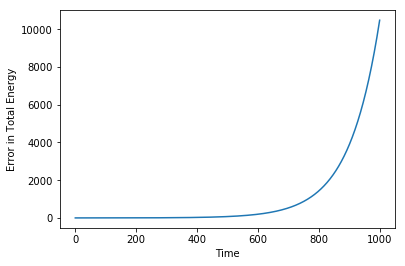

In [7]:
fig, ax = plt.subplots()
E0 = op.traj_totalE[0]
ax.plot(op.traj_totalE-E0)
ax.set_xlabel('Time')
ax.set_ylabel('Error in Total Energy')
plt.show()

### 2) Volume preservation
In order to assess the volume preservation property, we place 100 particles on a circe in phase space and monitor the enclosed volume as the system is evolved in time under the disrete dynamics:

In [8]:
# Specify model
dim =100
model = models.HarmonicOscillator(dim,k=1)
# Initialise integrator
integrator = integrators.EulerHamDyn(model, h=.1)
# Initialise Outputsheduler
op= outp.BufferedOutputshedulerU(integrator, Nsteps=300, varname_list=['q','p'], modprnt=1)
# Initialise particles on a disk
alpha = np.linspace(0,2*np.pi,dim)
q0 = .5*np.cos(alpha)
p0= 1 + .5*np.sin(alpha)
initial_values={'p': p0, 'q': q0}
# Run simulation
integrator.run(initial_values=initial_values)

The following code fragment plots the enclosed volume/area at different points in time. Does the enclosed area remain constant?

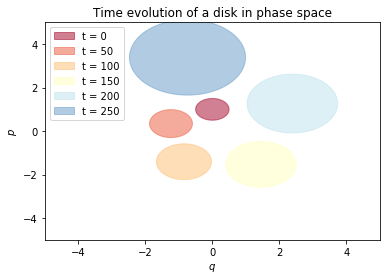

In [9]:
import matplotlib.patches as patches

# Specify frequency at which volumes is plotted
modplot = 50  
# Spefiy figure properties
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_xlabel('$q$')
ax.set_ylabel('$p$')
ax.set_title('Time evolution of a disk in phase space')


#Plot volumes
t_vec = np.arange(0,op.Nsteps,modplot)
mcmap=plt.cm.get_cmap('RdYlBu', int(op.Nsteps/modplot)+1)
for t in t_vec:
    v= np.array([op.traj_q[t,:], op.traj_p[t,:]]).transpose()
    go= patches.Polygon(v,closed=True,color=mcmap(int(t/modplot),alpha=.5),label='t = {}'.format(t))
    patch=ax.add_patch(go)
ax.legend()    
    
plt.show()

Plot the enclosed volume as a function of time. You can use the function `PolyArea(x,y)` defined below to compute the voume

In [ ]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

### 3) Time-reversibility
The below code generates 2 trajectories. First, one trajectory is generated by evolving the position and momenta of a particle starting at q=0,p=0 for 50 steps forward in time. Then, a second trajectory is generated starting at the last position in phase space of the first trajectory by evolving the system backward in time. What do we expect to happen for a time-reversible dynamics, and what do we expect to happen for a not time-reversible dynamics?

In [10]:
model = models.HarmonicOscillator(dim=1,k=1)
#sampler = VelocityVerlet(model, stepsize=.1)        
integrator = integrators.EulerHamDyn(model, h=.1)

#Initialising an outputsheduler. The 
op_forward= outp.BufferedOutputshedulerU(integrator, Nsteps=50, varname_list=['q','p'], modprnt=1)
#Add the outputsheduler to the sampler
integrator.outputsheduler = op_forward
#Specify initial conditions
initial_values={'p': np.array([1.0]), 'q': np.array([0.0])}
#Simulate forward in time
integrator.run(initial_values=initial_values)

#Specify integrator which will simulate backward in time 

integrator = integrators.EulerHamDyn(model, h=-.1)
#Initialising an outputsheduler used for the backward in time simultion
op_backward= outp.BufferedOutputshedulerU(integrator, Nsteps=50, varname_list=['q','p'], modprnt=1)
#Add the outputsheduler to the sampler
integrator.outputsheduler = op_backward
#Specify initial conditions
initial_values={'p': np.copy(op_forward.traj_p[-1,:]), 'q': np.copy(op_forward.traj_q[-1,:])}
#Simulate forward in time
integrator.run(initial_values=initial_values)

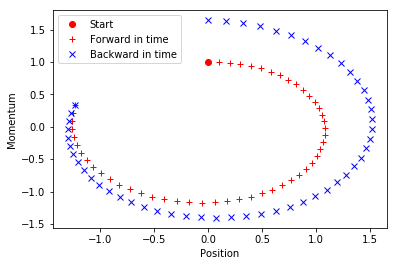

In [11]:
fig, ax = plt.subplots()
ax.plot(op_forward.traj_q[0,0],op_forward.traj_p[0,0],'ro',label="Start")
ax.plot(op_forward.traj_q,op_forward.traj_p,'r+',label="Forward in time")
ax.plot(op_backward.traj_q,op_backward.traj_p,'bx',label="Backward in time")
ax.legend()
ax.set_xlabel('Position')
ax.set_ylabel('Momentum')
plt.show()

## Exercise 2
In the file ./miniMD/models.py implement the class `LJOscillator` as a subclass of the class `Model` implementing a simple Lennar-Jones oscillator, which for $q>0$ is defined by the potential energy function

$$U(q) = 4\epsilon \left [ \left(\frac{\sigma}{q}\right )^{12} - \left(\frac{\sigma}{q}\right )^{6} \right]$$

with $\epsilon>0$ and $\sigma>0$ being positive constants. Use the following constructor in your class definition 

```
def __init__(self, dim=1, epsilon=1.0, sigma=1.0):
    super(LJOscillator,self).__init__(dim)
    self.epsilon = epsilon * np.ones(dim)
    self.sigma = sigma * np.ones(dim)
```
In addition to the constructor you will need to implement the functions `comp_force` and `comp_potential`. 

- create an instance of LJOscillator and use this instance to create a plot displaying q vs. potential, and q vs. force for different values of $\epsilon$ and $\sigma$. Which features of the potential function are specified by the values of $\epsilon$ and $\sigma$?
- check whether your implementation of `comp_force` and `comp_potential` are correct by creating a trajectory using the `VelocityVerlet` integrator. The total energy should remain approximately constant over the whole integration interval
- Determine the convergence order of the long time error in total energy as $h\rightarrow 0$. Follow the setup of Fig 3.2 in Ben's book using the initial values $q_0=1.5$ and $p_0=0.0$ and generate the different values for the stepsize with the command `h_vec = np.logspace(0.0025, 0.01, num=num, endpoint=True )`.  
- If you have some time left plot again the time evolution of the volume of a disk in phase space using the Velocity Verlet method and the Symplectic Euler method as you did for the Harmonic oscillator in Exercise 1. 

## Exercise 3

- Implement the Lennard-Jones trimer model as described in Example 1.8 on Page 38 of Ben's book (Molecular Dynamics, Springer 2014)
- Assert the correctness of your implementation by checking whether the total Energy is approximately conserved under the dynamics of the Velocity Verlet method. You can use the same initial values, choice of stepsize and number of time steps as specified in section 2.1.1 of Ben's book 
- Reproduce Fig 2.3  and Fig 2.4 in Ben's book. It is sufficient if you plot the result for just one single initial condition